# 190809 
- 190808과 이어집니다

# Inverted Index

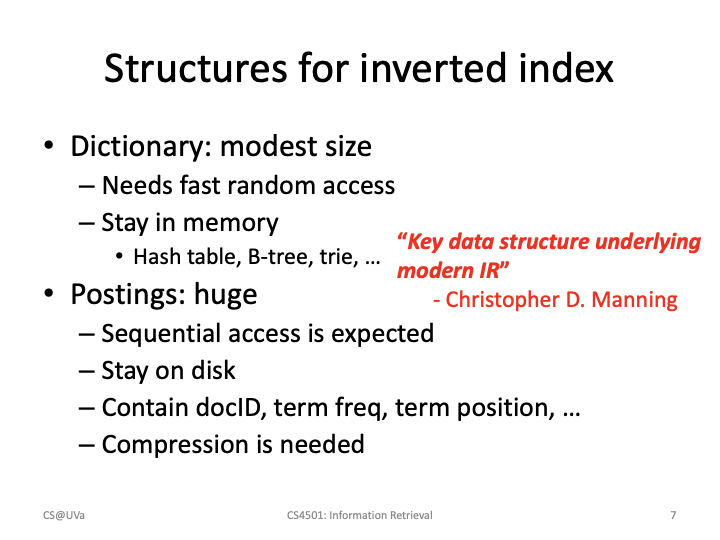

In [27]:
from collections import defaultdict

DTM = defaultdict(lambda:defaultdict(int))

for i,d in enumerate(BoM):
    for j,t in enumerate(d):
        if t==1:
            DTM[i][j]=t
            
            
#sparse는 해결, 하지만 복잡도가 줄어든건 아님..

In [28]:
len(DTM[10]), DTM[10] # 10번 문서에는 11,48,75..........

(1108,
 defaultdict(int,
             {18: 1,
              34: 1,
              46: 1,
              78: 1,
              185: 1,
              188: 1,
              191: 1,
              196: 1,
              233: 1,
              280: 1,
              286: 1,
              313: 1,
              319: 1,
              324: 1,
              341: 1,
              377: 1,
              390: 1,
              429: 1,
              434: 1,
              460: 1,
              517: 1,
              521: 1,
              541: 1,
              561: 1,
              563: 1,
              564: 1,
              624: 1,
              653: 1,
              706: 1,
              711: 1,
              730: 1,
              737: 1,
              766: 1,
              824: 1,
              825: 1,
              837: 1,
              854: 1,
              870: 1,
              872: 1,
              885: 1,
              914: 1,
              921: 1,
              949: 1,
              955: 1,
           

In [29]:
TDM = defaultdict(lambda:defaultdict(int))
for i, termDict in DTM.items():
    for j,b in termDict.items():
        TDM[j][i]=b

In [33]:
Vocabulary[11], TDM[11]  

('정치하는', defaultdict(int, {6: 1}))

In [34]:
#Query = ['국민', '법안']
searchResult = list()
for q in Query:
    j = Vocabulary.index(q)
    searchResult.append(list(TDM[j].keys()))
    
#for문이 확 줄었다.
    

In [35]:
set(searchResult[0]).intersection(searchResult[1])

{17, 18}

처음의 복잡도 :O(|Q| * D * |D|)

TDM 복잡도 : O(|Q|* avg(|D|))

In [52]:
#실시간 처리가 가능할정도로 속도가 빨라진다. (BoM 의 특징도 담고있다.)
#앞으로 텍스트를 벡터화할때 이게 기본.

이걸 다시 termVector로 만드는것도 가능

In [36]:
termVector = list(list(0 for _ in range(len(collection)))#35
                 for _ in range(len(Vocabulary)))#2만 몇개
for j, docDict in TDM.items():
    for i in range(len(collection)):
        termVector[j][i]=docDict[i]

In [37]:
len(termVector), len(termVector[0])   # 20558 * 35 matrix

(20558, 35)

- numpy로 바꿀수 있다는것은, 다른 모델의 feature로 사용할수 있다는것..

In [39]:
import numpy as np
_BoM = np.array(termVector)
len(_BoM), len(_BoM[0])

(20558, 35)

In [40]:
sum(_BoM.T[0]),(len(_BoM.T), len(_BoM.T[1]))

(1393, (35, 20558))

In [41]:
BoM[0]
sum(BoM[0])

1393

In [42]:
D =[ ["A","B"], ["D","C"], ["A","C"] ]
Dictionary = defaultdict(lambda:-1) #다음위치에대한 default값, 0부터시작할거니까
Postings = open('postings.dat', 'w')

V = list()
for j,d in enumerate(D):
    for t in d:
        if t not in V:
            V.append(t)
        i = V.index(t)
        nextPosition = Dictionary[i]
        _struct = (str(j), str(1), str(nextPosition))  #몇번째 문서에서 1번나왔고 다음문서는 몇번이고
        Dictionary[i] = Postings.tell()
        #print(_struct)
        Postings.write(",".join(_struct)+'\n')
        
Postings.close()

In [43]:
Dictionary  #0번째 단어는 4번위치 

defaultdict(<function __main__.<lambda>()>, {0: 28, 1: 7, 2: 14, 3: 34})

In [44]:
Postings

<_io.TextIOWrapper name='postings.dat' mode='w' encoding='UTF-8'>

In [45]:
V

['A', 'B', 'D', 'C']

In [46]:
Q = ["C"]
Postings = open("postings.dat")
for q in Q:
    i=V.index(q)
    nextPosition = Dictionary[i]
    while True:
        Postings.seek(nextPosition)
        _struct = list(int(_.strip()) for _ in Postings.readline().split(','))
        nextPosition= int(_struct[2])
        print("{0}번째 문서, {1}번, 다음위치:{2}".format(_struct[0],_struct[1],_struct[2]))
        if nextPosition== -1:
            break
Postings.close()

#바이트 읽

2번째 문서, 1번, 다음위치:21
1번째 문서, 1번, 다음위치:-1


#지금 저장한 파일은 스트링형태로 저장했는데, 구조체 형태로? 바이트로 저장해볼거에요.
#이건 기본구조에요 , 나중에 여기다가 계산할거거든요.


In [47]:
from struct import pack,unpack   #이게 그걸 해준다.

D =[
    ["A","B"],
    ["D","C"],
    ["A","C"],
]
Dictionary = defaultdict(lambda:-1) #다음위치에대한 default값, 0부터시작할거니까
Postings = open('postings.dat', 'wb')  #바이트로 저장

V = list()
for j,d in enumerate(D):
    for t in d:
        if t not in V:
            V.append(t)
        i = V.index(t)
        nextPosition = Dictionary[i]
        _struct = pack("iii",j, 1, nextPosition)  #pack을 이용해서 바이트로 바꿀거에요 (int 3개 forma)
        Dictionary[i] = Postings.tell()
        Postings.write(_struct)
        
Postings.close()

In [48]:
with open("postings.dat", "rb") as fp:
    print(fp.read())

b'\x00\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x02\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00$\x00\x00\x00'


In [49]:
Q = ["C"]
Postings = open("postings.dat", "rb")
for q in Q:
    i=V.index(q)
    nextPosition = Dictionary[i]
    while True:
        Postings.seek(nextPosition)
        _struct = unpack("iii",Postings.read(4*3))
        nextPosition= int(_struct[2])
        print("{0}번째 문서, {1}번, 다음위치:{2}".format(_struct[0],_struct[1],_struct[2]))
        if nextPosition== -1:
            break
Postings.close()

2번째 문서, 1번, 다음위치:36
1번째 문서, 1번, 다음위치:-1


In [50]:
from struct import pack,unpack   

D =[
    ["A","B"],
    ["D","C"],
    ["A","C"],
]
Dictionary = defaultdict(int) #다음위치에대한 default값, 0부터시작할거니까
#Postings = open('postings.dat', 'wb')  #바이트로 저장

V = list()
for j,d in enumerate(D):
    for t in d:
        if t not in V:
            V.append(t)
        i = V.index(t)
        TDM[i][j]=1
        
#Postings.close()

In [51]:
Q = ["A","C"]
#Postings = open("postings.dat")
for q in Q:
    i=V.index(q)
    
    for d, b in TDM[i].items():
        print("{0}번째 문서, {1}번".format(d,b))

2번째 문서, 1번
0번째 문서, 1번
1번째 문서, 0번
3번째 문서, 0번
4번째 문서, 0번
5번째 문서, 0번
6번째 문서, 0번
7번째 문서, 0번
8번째 문서, 0번
9번째 문서, 0번
10번째 문서, 0번
11번째 문서, 0번
12번째 문서, 0번
13번째 문서, 0번
14번째 문서, 0번
15번째 문서, 0번
16번째 문서, 0번
17번째 문서, 0번
18번째 문서, 0번
19번째 문서, 0번
20번째 문서, 0번
21번째 문서, 0번
22번째 문서, 0번
23번째 문서, 0번
24번째 문서, 0번
25번째 문서, 0번
26번째 문서, 0번
27번째 문서, 0번
28번째 문서, 0번
29번째 문서, 0번
30번째 문서, 0번
31번째 문서, 0번
32번째 문서, 0번
33번째 문서, 0번
34번째 문서, 0번
0번째 문서, 1번
8번째 문서, 1번
32번째 문서, 1번
1번째 문서, 1번
2번째 문서, 1번
3번째 문서, 0번
4번째 문서, 0번
5번째 문서, 0번
6번째 문서, 0번
7번째 문서, 0번
9번째 문서, 0번
10번째 문서, 0번
11번째 문서, 0번
12번째 문서, 0번
13번째 문서, 0번
14번째 문서, 0번
15번째 문서, 0번
16번째 문서, 0번
17번째 문서, 0번
18번째 문서, 0번
19번째 문서, 0번
20번째 문서, 0번
21번째 문서, 0번
22번째 문서, 0번
23번째 문서, 0번
24번째 문서, 0번
25번째 문서, 0번
26번째 문서, 0번
27번째 문서, 0번
28번째 문서, 0번
29번째 문서, 0번
30번째 문서, 0번
31번째 문서, 0번
33번째 문서, 0번
34번째 문서, 0번


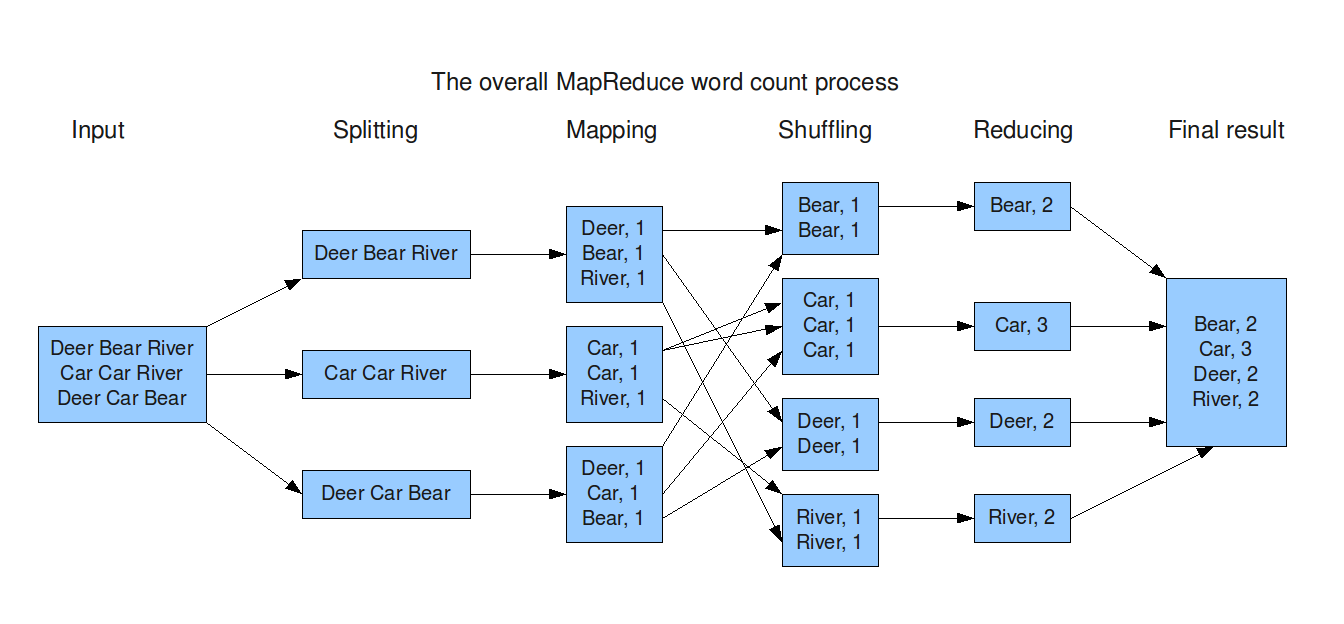

map reduce 방식

우리도 map reduce방식으로 posting데이터를 저장

로컬영역에서 쪼개고 글로벌 영역에서 merge

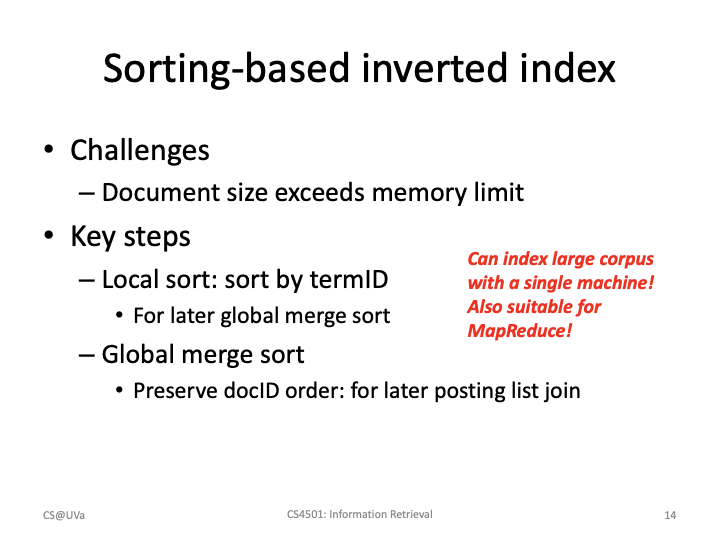

# 빈도수까지 같이하는거

In [57]:
collection[0]

'동영상 뉴스\n택시면허 매입 비용 대기업 시장 장악 우려 앵커 타다를 둘러싼 갈등 이후 이른바 혁신 사업자와 기존 업계가 과연 공존할 수 있느냐 그러면 방안은 뭐냐 이것을 놓고 말그대로 각계각층의 논쟁이 벌어졌습니다 정부의 이번 대책이 그 해답을 제시한 것인지 취재기자와 이야기 해보겠습니다 이한주 기자가 나와있습니다 정부의 상생안이 시행되면 구체적으로 어떤 것들이 달라지나요 기자 이번 정부안은 새로운 플랫폼 사업자들을 기존 제도권 안으로 최대한 흡수하겠다는 것입니다 타다로 대표되는 플랫폼 업체들은 택시와 경쟁했지만 사업구조는 달랐는데요 렌터카와 기사를 통째로 빌리는 방식으로 현재 운수사업법을 우회했습니다 정부는 이것을 택시처럼 면허를 받아 운행하도록 한 것입니다 다만 새로운 서비스가 안착할 수 있도록 확실한 법적 장치도 만들어 주기로 했습니다 서비스와 요금에는 제한을 두지 않기로 한 것이 대표적입니다 앵커 합법이냐 불법이냐 이 문제는 풀린 것 같고 그러면 승객들 입장에서는 어떤가요 달라진 것이 있습니까 기자 그동안 승객들의 가장 큰 불만은 내 돈 주고 택시를 타는데 왜 기사들의 눈치를 봐야 하는가였습니다 승차거부와 과속도 택시에 대한 불신을 키웠습니다 다양한 택시들이 제도화되면서 이런 불만들은 상당부분 줄어들 것으로 보입니다 원하는 형태의 택시를 가격에 맞춰 골라 탈 수 있게 됐기 때문입니다 다만 서비스를 누리려면 요금도 더 내야할 것으로 보입니다 이미 타다는 택시 요금보다 20가 높고 브랜드 택시와 카카오 택시 등은 최대 1만 원의 콜비를 내야 하는데요 앞으로 시간대별로 요금 등 부과방식도 좀 더 다양해질 전망입니다 앵커 그러면 타다는 뭐라고 합니까 아까 이새누리 기자 리포트에서 타다가 기여금도 내야 한다고 했잖아요 받아들이겠다고 합니까 기자 맞습니다 원칙적으로는 수용하겠지만 세부적인 부분은 좀 따져봐야 한다는 입장입니다 당장 정부가 면허를 주겠다는 플랫폼 택시는 1000여 대인데요 타다가 현재 운행하는 차만 1000대가 넘습니다 다른 업체들까지 감안하면 

In [58]:
V = list()
D = list()

DTM = defaultdict(lambda:defaultdict(int))

for d in collection:
    i = len(D)
    D.append(i)
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]: #명사만 가지고 controlled vocab
        if t not in V:
            V.append(t)
        j = V.index(t)
        DTM[i][j] +=1

TDM = defaultdict(lambda:defaultdict(int))

for i, terms in DTM.items():
    for j,f in terms.items():
        TDM[j][i] = f
        
#V[0]
# TDM[0]
# len(V), len(DTM)

In [59]:
#%%timeit
for j, docs in TDM.items():
    for i, f in docs.items():
        print(V[j], D[i], f)
        
#834 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

동영상 0 1
동영상 5 1
동영상 6 1
동영상 10 1
동영상 15 1
동영상 18 1
동영상 19 1
동영상 23 1
뉴스 0 3
뉴스 1 2
뉴스 2 1
뉴스 3 2
뉴스 4 1
뉴스 5 3
뉴스 6 4
뉴스 7 6
뉴스 8 5
뉴스 9 1
뉴스 10 3
뉴스 11 3
뉴스 12 3
뉴스 13 2
뉴스 14 3
뉴스 15 3
뉴스 16 4
뉴스 17 3
뉴스 18 6
뉴스 19 3
뉴스 23 3
뉴스 25 5
뉴스 26 5
뉴스 27 3
뉴스 28 3
뉴스 29 5
뉴스 30 1
뉴스 31 2
뉴스 32 3
뉴스 33 4
뉴스 34 3
택시 0 13
택시 10 11
택시 11 7
택시 13 31
택시 14 8
택시 30 8
면허 0 5
면허 10 4
면허 11 2
면허 13 12
면허 14 2
면허 30 4
매입 0 1
매입 10 2
매입 11 1
매입 13 1
매입 14 1
비용 0 1
비용 10 2
비용 15 1
비용 30 1
대기업 0 2
대기업 13 1
대기업 14 1
대기업 30 4
대기업 33 1
시장 0 2
시장 12 1
시장 30 1
시장 32 2
장악 0 2
우려 0 2
우려 11 1
우려 14 1
우려 22 1
우려 31 1
앵커 0 4
앵커 5 4
앵커 6 2
앵커 10 1
앵커 12 1
앵커 14 1
앵커 15 1
앵커 18 1
앵커 19 1
앵커 21 1
앵커 27 1
앵커 28 1
앵커 29 1
앵커 31 2
앵커 34 1
갈등 0 3
갈등 5 1
갈등 6 1
갈등 10 2
갈등 26 1
갈등 29 1
이후 0 1
이후 6 1
이후 7 1
이후 10 1
이후 16 1
이후 17 2
이후 22 1
이후 23 1
이후 27 1
이후 32 1
혁신 0 1
혁신 4 1
혁신 8 7
혁신 13 2
혁신 14 2
혁신 30 1
혁신 32 1
사업자 0 3
사업자 10 2
사업자 13 6
사업자 34 5
기존 0 2
기존 7 1
기존 13 3
기존 30 3
업계 0 1
업계 10 3
업계 11 4
업계 13 1
업계 14 5
업계 30 2


네이버 12 1
네이버 13 1
네이버 14 1
네이버 15 1
네이버 16 1
네이버 17 1
네이버 18 1
네이버 19 1
네이버 24 1
네이버 25 1
네이버 26 1
네이버 27 1
네이버 28 1
네이버 29 1
네이버 30 1
네이버 31 1
네이버 32 1
네이버 33 18
네이버 34 1
채널 1 1
채널 8 1
채널 10 2
채널 11 1
채널 12 1
채널 14 1
채널 15 2
채널 16 1
채널 18 1
채널 19 2
채널 24 1
채널 26 1
채널 27 1
채널 29 1
채널 31 1
채널 34 1
구독 1 1
구독 7 1
구독 8 1
구독 10 1
구독 11 1
구독 12 1
구독 14 1
구독 15 1
구독 16 1
구독 17 1
구독 18 1
구독 19 1
구독 24 1
구독 25 1
구독 26 1
구독 27 1
구독 28 1
구독 29 1
구독 31 1
구독 33 1
구독 34 1
당신 1 1
당신 11 1
당신 12 1
당신 14 1
당신 26 1
당신 27 1
당신 29 1
당신 31 1
당신 34 1
진짜 1 1
진짜 11 1
진짜 12 1
진짜 14 1
진짜 26 1
진짜 27 1
진짜 29 1
진짜 31 1
진짜 34 1
케이 1 1
케이 11 1
케이 12 1
케이 14 1
케이 26 1
케이 27 1
케이 29 1
케이 31 1
케이 34 1
배우 2 1
강 2 15
강 9 1
강 12 1
강 23 1
지환 2 2
배 2 1
배 23 3
배 26 1
배 29 1
배 34 1
우 2 1
우 28 1
우 32 1
42 2 1
본명 2 1
성폭력 2 2
성폭력 16 1
사건 2 3
사건 5 2
사건 7 1
사건 16 1
사건 17 2
중인 2 1
씨 2 7
씨 15 3
씨 16 12
씨 23 3
마약 2 3
검사도 2 1
의뢰 2 2
의뢰 12 1
보도 2 1
보도 3 2
보도 5 2
보도 10 1
보도 15 1
보도 19 1
보도 26 2
보도 28 1
보도 29 2
보도 34 1
투약 2 1
의심 2 1
의심 20

이 13 4
이 17 1
이 19 1
이 20 1
이 21 1
이 22 3
이 23 1
이 24 2
이 27 2
이 30 1
이 32 1
이 34 1
뒷받침 5 1
근거 5 1
사법 5 13
사법 17 2
자제 5 11
자제 7 1
원칙 5 11
등장 5 2
타당 5 1
주장 5 5
주장 13 2
주장 15 2
주장 21 1
주장 25 1
주장 27 2
주장 33 4
체크 5 1
배상 5 5
배상 7 1
외교적 5 3
외교적 7 1
외교적 9 2
사법부 5 6
행정부 5 4
적극적 5 1
며칠 5 1
방송 5 1
방송 31 1
방송 34 4
재판 5 8
재판 16 1
재판 19 2
재판 22 1
결과 5 2
결과 7 1
결과 9 1
결과 12 1
결과 24 2
결과 28 2
결과 32 1
결과 34 1
정리 5 1
대법원 5 4
대법원 23 1
무리 5 1
무리 21 2
관계 5 1
관계 9 1
관계 12 1
원인 5 1
원인 15 1
법 5 1
법 11 1
법 14 1
법 18 1
법 28 1
약속 5 1
약속 27 1
전세계 5 1
전세계 32 1
도 5 1
도 25 2
심사 5 1
과도 5 1
기본권 5 1
보장 5 1
보장 10 1
보장 30 1
법치 5 1
주의 5 1
주의 31 1
주의 32 1
포기 5 1
바 5 1
바 27 1
바 30 2
바 32 1
영미 5 1
사실 5 3
사실 12 1
사실 16 4
사실 17 2
사실 27 1
사실 28 1
사례 5 1
사례 26 1
2000 5 1
2000 32 3
년대 5 1
년대 32 1
헌법 5 1
가치 5 1
가치 32 1
인권 5 1
부각 5 1
중시 5 1
관행 5 1
평가 5 1
평가 12 7
평가 13 1
평가 30 1
평가 33 1
권리 5 3
중요시 5 1
철강 5 1
전범 5 5
신일 5 1
철주 5 1
금 5 1
금 6 1
금 7 1
금 10 1
손해 5 1
소송 5 1
소송 10 1
소송 23 1
할아버지 5 2
모습 5 1
모습 8 1
모습 17 1
2012 5 1
5 5 1
5 

소리 21 1
목회자 21 3
선호 21 1
세태 21 1
설교자 21 1
열매 21 2
복음 21 2
복음 22 2
임도 21 1
휴머니즘 21 1
이념 21 1
긍정적 21 1
도전적 21 1
둔갑 21 1
변질 21 1
결실 21 1
성품 21 1
영적 21 1
태도 21 1
유업 21 1
가르침 21 1
대목 21 1
대목 22 1
당대 21 1
서기관 21 1
과 21 1
72829 21 1
충격 21 2
자아 21 1
신화 21 1
순간 21 1
첫걸음 21 1
양민 21 1
양민 22 1
내가 22 1
하리 22 1
요임 22 1
현수 22 2
규장 22 1
식량 22 1
의료 22 1
진흥 22 1
공업 22 1
시설 22 1
방면 22 1
대북 22 2
대북 27 3
대북 28 5
북한 22 10
북한 27 8
북한 28 5
억류 22 2
한국계 22 1
캐나다 22 2
임 22 7
임 27 1
토론토 22 1
원로 22 1
옥중 22 1
회고록 22 1
한화 22 1
550 22 1
전복 22 1
음모 22 1
949 22 1
옥살이 22 1
최장기 22 1
기록 22 1
김일성 22 1
김정일 22 1
김정일 28 1
당국 22 2
일방적 22 1
무기 22 1
무기 32 1
노동 22 1
교화 22 1
극적 22 1
하루아침 22 1
대역죄 22 1
동포 22 1
고난 22 2
동참 22 1
회고 22 1
수감자 22 1
간수 22 2
형편 22 1
세대 22 1
세대 32 1
정권 22 1
노예 22 1
평생 22 1
현실 22 1
자괴감 22 1
간부 22 1
마음 22 1
마음 33 1
지심 22 1
통역 22 1
통일 22 2
통일 28 1
원리 22 1
곳곳 22 1
주민 22 1
사랑 22 1
고백 22 2
죄악 22 1
훈련 22 1
훈련 27 5
유익 22 1
용서 22 1
예레미 22 1
다니엘 22 1
바울 22 1
선지자 22 1
훗날 22 2
귀 22 1
종 22 1
변장 22 1
축복 22 1
나선 22 1
나선 3

In [60]:
V = list()
D = list()
Dictionary = defaultdict(lambda:-1)
Postings = list()



for d in collection:
    #i : Document ID
    i = len(D)
    D.append(i)
    localPostings = defaultdict(int)
    
    #sort by term ID
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]: #명사만 가지고 controlled vocab
        if t not in V:
            V.append(t)
        j = V.index(t)
        localPostings[j] += 1
    
    for j, f in localPostings.items():
        #preserve Document ID
        nextPosition = Dictionary[j]
        _struct = (i, f, nextPosition)
        Dictionary[j] = len(Postings)
        Postings.append(_struct)
    

In [61]:
#%%timeit

for j in range(len(V)):
    nextPosition = Dictionary[j]
    while True:
        _struct = Postings[nextPosition]
        nextPosition = _struct[2]
        print(V[j], D[_struct[0]], _struct[1])
        if nextPosition ==-1:
            break
            
            
#846 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

동영상 23 1
동영상 19 1
동영상 18 1
동영상 15 1
동영상 10 1
동영상 6 1
동영상 5 1
동영상 0 1
뉴스 34 3
뉴스 33 4
뉴스 32 3
뉴스 31 2
뉴스 30 1
뉴스 29 5
뉴스 28 3
뉴스 27 3
뉴스 26 5
뉴스 25 5
뉴스 23 3
뉴스 19 3
뉴스 18 6
뉴스 17 3
뉴스 16 4
뉴스 15 3
뉴스 14 3
뉴스 13 2
뉴스 12 3
뉴스 11 3
뉴스 10 3
뉴스 9 1
뉴스 8 5
뉴스 7 6
뉴스 6 4
뉴스 5 3
뉴스 4 1
뉴스 3 2
뉴스 2 1
뉴스 1 2
뉴스 0 3
택시 30 8
택시 14 8
택시 13 31
택시 11 7
택시 10 11
택시 0 13
면허 30 4
면허 14 2
면허 13 12
면허 11 2
면허 10 4
면허 0 5
매입 14 1
매입 13 1
매입 11 1
매입 10 2
매입 0 1
비용 30 1
비용 15 1
비용 10 2
비용 0 1
대기업 33 1
대기업 30 4
대기업 14 1
대기업 13 1
대기업 0 2
시장 32 2
시장 30 1
시장 12 1
시장 0 2
장악 0 2
우려 31 1
우려 22 1
우려 14 1
우려 11 1
우려 0 2
앵커 34 1
앵커 31 2
앵커 29 1
앵커 28 1
앵커 27 1
앵커 21 1
앵커 19 1
앵커 18 1
앵커 15 1
앵커 14 1
앵커 12 1
앵커 10 1
앵커 6 2
앵커 5 4
앵커 0 4
갈등 29 1
갈등 26 1
갈등 10 2
갈등 6 1
갈등 5 1
갈등 0 3
이후 32 1
이후 27 1
이후 23 1
이후 22 1
이후 17 2
이후 16 1
이후 10 1
이후 7 1
이후 6 1
이후 0 1
혁신 32 1
혁신 30 1
혁신 14 2
혁신 13 2
혁신 8 7
혁신 4 1
혁신 0 1
사업자 34 5
사업자 13 6
사업자 10 2
사업자 0 3
기존 30 3
기존 13 3
기존 7 1
기존 0 2
업계 33 2
업계 32 5
업계 30 2
업계 14 5
업계 13 1
업계 11 4

네이버 15 1
네이버 14 1
네이버 13 1
네이버 12 1
네이버 11 1
네이버 10 1
네이버 9 1
네이버 8 1
네이버 7 1
네이버 4 1
네이버 3 1
네이버 2 1
네이버 1 1
채널 34 1
채널 31 1
채널 29 1
채널 27 1
채널 26 1
채널 24 1
채널 19 2
채널 18 1
채널 16 1
채널 15 2
채널 14 1
채널 12 1
채널 11 1
채널 10 2
채널 8 1
채널 1 1
구독 34 1
구독 33 1
구독 31 1
구독 29 1
구독 28 1
구독 27 1
구독 26 1
구독 25 1
구독 24 1
구독 19 1
구독 18 1
구독 17 1
구독 16 1
구독 15 1
구독 14 1
구독 12 1
구독 11 1
구독 10 1
구독 8 1
구독 7 1
구독 1 1
당신 34 1
당신 31 1
당신 29 1
당신 27 1
당신 26 1
당신 14 1
당신 12 1
당신 11 1
당신 1 1
진짜 34 1
진짜 31 1
진짜 29 1
진짜 27 1
진짜 26 1
진짜 14 1
진짜 12 1
진짜 11 1
진짜 1 1
케이 34 1
케이 31 1
케이 29 1
케이 27 1
케이 26 1
케이 14 1
케이 12 1
케이 11 1
케이 1 1
배우 2 1
강 23 1
강 12 1
강 9 1
강 2 15
지환 2 2
배 34 1
배 29 1
배 26 1
배 23 3
배 2 1
우 32 1
우 28 1
우 2 1
42 2 1
본명 2 1
성폭력 16 1
성폭력 2 2
사건 17 2
사건 16 1
사건 7 1
사건 5 2
사건 2 3
중인 2 1
씨 23 3
씨 16 12
씨 15 3
씨 2 7
마약 2 3
검사도 2 1
의뢰 12 1
의뢰 2 2
보도 34 1
보도 29 2
보도 28 1
보도 26 2
보도 19 1
보도 15 1
보도 10 1
보도 5 2
보도 3 2
보도 2 1
투약 2 1
의심 28 1
의심 20 1
의심 2 1
배경 20 1
배경 7 1
배경 2 1
당일 2 3
행동 24 1
행동 10 1
행동 2 3

중요시 5 1
철강 5 1
전범 5 5
신일 5 1
철주 5 1
금 10 1
금 7 1
금 6 1
금 5 1
손해 5 1
소송 23 1
소송 10 1
소송 5 1
할아버지 5 2
모습 17 1
모습 8 1
모습 5 1
2012 5 1
5 34 1
5 32 1
5 31 2
5 24 1
5 17 1
5 16 1
5 15 1
5 8 1
5 7 4
5 5 1
승소 5 1
취지 5 1
10 33 1
10 15 3
10 12 2
10 8 1
10 7 3
10 6 1
10 5 1
최종 14 1
최종 11 1
최종 5 1
결론 19 1
결론 5 2
정치 17 1
정치 8 7
정치 7 1
정치 6 3
정치 5 2
논리 5 3
불법적 5 1
식민 5 1
지배 5 1
입 15 1
입 5 1
고려 24 1
고려 10 1
고려 9 1
고려 5 1
구제 5 1
선택 20 1
선택 5 1
박근 5 1
시절 6 1
시절 5 1
승 19 1
승 8 1
승 5 1
태 19 2
태 5 1
선고 22 1
선고 16 3
선고 5 1
계속 32 1
계속 25 1
계속 10 1
계속 5 1
쪽 5 2
소통 27 1
소통 5 6
자체 32 2
자체 31 1
자체 21 1
자체 14 1
자체 12 2
자체 5 1
정상적 5 1
절차 18 1
절차 5 1
가요 5 1
농단 5 2
진행 30 1
진행 12 1
진행 7 2
진행 5 1
중 32 1
중 27 1
중 25 4
중 17 1
중 15 1
중 12 1
중 7 3
중 5 1
확정 30 1
확정 5 1
검찰 17 2
검찰 5 2
2015 33 1
2015 28 1
2015 5 1
7 33 1
7 28 1
7 16 1
7 15 1
7 7 3
7 5 1
상고 5 2
입법 34 2
입법 5 1
청와 5 1
설득 5 1
전략 32 1
전략 30 1
전략 5 1
대외비 5 1
문건 34 1
문건 5 1
이병기 5 1
비서실장 5 1
관심사 5 1
관심 20 1
관심 7 1
관심 5 1
설치 25 1
설치 5 1
데 28 2
데 20 1
데 14 2
데 13 1
데

혈액 12 8
백 34 1
백 32 1
백 18 1
백 17 1
백 12 8
담합 12 3
녹십자 12 6
태창 12 3
과징금 12 1
적십자 12 13
공급 13 1
공급 12 1
외국계 12 4
제품 33 1
제품 12 3
사가 12 1
영 34 3
영 17 1
영 12 3
납품 12 2
입찰 12 6
참가 12 1
하면서 22 1
하면서 21 1
하면서 12 1
약 17 1
약 12 1
처의 12 1
허가 13 1
허가 12 1
성능 12 4
탈락 12 2
혁기 12 1
안전 15 1
안전 12 1
아무 12 1
항목 33 1
항목 28 1
항목 12 4
100 33 1
100 16 1
100 13 2
100 12 1
적합 12 1
외국 32 1
외국 12 1
전체 12 1
물량 12 1
절반 13 1
절반 12 1
낙찰 12 1
직원 32 1
직원 16 3
직원 15 6
직원 12 1
음성 29 1
음성 26 1
음성 20 1
음성 12 1
변조 29 1
변조 26 1
변조 12 1
작년 12 1
데이터 32 1
데이터 12 1
값 12 1
오픈 12 1
상태 32 1
상태 19 2
상태 12 1
저희 33 1
저희 29 1
저희 26 1
저희 12 1
고요 12 1
유착 12 2
주성 12 1
건강 24 1
건강 12 1
세상 32 2
세상 21 4
세상 19 1
세상 17 1
세상 12 1
네트워크 12 1
공정위 12 1
고발 18 2
고발 17 8
고발 12 1
번 28 1
번 18 1
번 12 1
유리 14 1
유리 12 1
조달청 12 1
대가 15 1
대가 13 2
자격증 13 5
검증 33 1
검증 13 2
승합 13 2
고급 13 2
형 32 4
형 30 1
형 22 1
형 13 4
랜 13 5
이즈 13 5
불리 13 2
버스 13 1
발전 33 1
발전 13 2
을 32 1
을 24 1
을 22 1
을 13 3
도심 13 1
호출 30 1
호출 13 2
신호 13 1
대기 13 1
은 20 1
은 13 1
신기술 13 1
모 30 

톱 27 1
급 31 1
급 27 1
분란 27 1
단거리 27 1
미사일 27 1
발사 27 1
관건 34 1
관건 27 1
사치품 28 7
수입 28 1
구멍 28 1
지수 28 3
국방 28 1
관여 28 1
금액 32 1
금액 28 1
콕스 28 2
93 28 1
압도적 28 1
러시아 28 1
2016 28 1
82 28 1
고가 28 1
자동차 28 1
803 28 1
인도 28 1
위반 28 1
상위 28 1
보석 28 1
시계 28 1
요트 28 1
향수 28 1
코드 28 1
상품 33 3
상품 28 1
체계 28 1
유엔 28 2
안보리 28 2
32 28 1
9100 28 1
군사 28 1
용품 28 1
물건 28 1
유입 28 1
집행 28 1
보고 33 1
보고 28 1
수치 28 1
허점 28 1
이메일 28 1
16610190 28 1
반색 29 1
네티즌 29 1
노출 29 1
중앙 29 1
유통 34 2
유통 29 1
추적 29 1
조달 30 2
자율성 30 2
세부 30 1
공하 30 1
발판 30 1
해당 30 2
프리 32 4
프리 30 1
기 30 1
조합 30 1
공항 30 1
부여 32 1
부여 30 1
확장성 30 1
모든 30 1
신규 32 1
신규 30 1
판매 30 1
이해관계 30 1
근간 30 1
까닭 30 1
철회 30 1
제로 30 1
강자 30 1
대항마 30 1
후보 30 1
현대 30 2
모회사 30 1
지분 30 1
두원 30 1
평가원 30 1
연구소 30 1
동반 31 1
동반 30 1
위의 30 1
협약 30 1
분야 30 1
간의 30 1
경쟁이 30 1
수행 30 1
양상 30 1
장마 31 7
전선 31 5
북상 31 6
경남 31 2
내일 31 3
비가 31 2
예보 31 1
태풍 31 5
나스 31 2
우리나라 31 1
재난 31 1
스튜디오 31 1
기상 31 1
전문 31 1
장맛비 31 3
위성 31 2
비구름 31 2
남해안 31 1
남부 31 4
밤 31 2
충 31 1
청과

In [ ]:
#이제 위에꺼를 파일로 바꿀거다.

In [62]:
V = list()   #Vocabulary
D = list()   #Document
Dictionary = defaultdict(lambda:-1)
Postings = open("postings.dat", "w")



for d in collection:
    # i : document ID
    i = len(D)
    D.append(i)
    localPostings = defaultdict(int)
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]: #명사만 가지고 controlled vocab
        if t not in V:
            V.append(t)
        j = V.index(t)
        localPostings[j] += 1
    
    for j, f in localPostings.items():
        nextPosition = Dictionary[j]
        _struct = (i, f, nextPosition)
        Dictionary[j] = Postings.tell()
        Postings.write("{0}, {1}, {2}\n".format(_struct[0],_struct[1],_struct[2]))


        
Postings.close()

In [63]:
#%%timeit
with open("postings.dat") as Postings:

    for j in range(len(V)):
        nextPosition = Dictionary[j]
        while True:
            Postings.seek(nextPosition)
            _struct = [int(_.strip()) for _ in Postings.readline().split(",")]
            nextPosition = _struct[2]
            print(V[j], D[_struct[0]], _struct[1])
            if nextPosition ==-1:
                break
Postings.close()             

#1.12 s ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

동영상 23 1
동영상 19 1
동영상 18 1
동영상 15 1
동영상 10 1
동영상 6 1
동영상 5 1
동영상 0 1
뉴스 34 3
뉴스 33 4
뉴스 32 3
뉴스 31 2
뉴스 30 1
뉴스 29 5
뉴스 28 3
뉴스 27 3
뉴스 26 5
뉴스 25 5
뉴스 23 3
뉴스 19 3
뉴스 18 6
뉴스 17 3
뉴스 16 4
뉴스 15 3
뉴스 14 3
뉴스 13 2
뉴스 12 3
뉴스 11 3
뉴스 10 3
뉴스 9 1
뉴스 8 5
뉴스 7 6
뉴스 6 4
뉴스 5 3
뉴스 4 1
뉴스 3 2
뉴스 2 1
뉴스 1 2
뉴스 0 3
택시 30 8
택시 14 8
택시 13 31
택시 11 7
택시 10 11
택시 0 13
면허 30 4
면허 14 2
면허 13 12
면허 11 2
면허 10 4
면허 0 5
매입 14 1
매입 13 1
매입 11 1
매입 10 2
매입 0 1
비용 30 1
비용 15 1
비용 10 2
비용 0 1
대기업 33 1
대기업 30 4
대기업 14 1
대기업 13 1
대기업 0 2
시장 32 2
시장 30 1
시장 12 1
시장 0 2
장악 0 2
우려 31 1
우려 22 1
우려 14 1
우려 11 1
우려 0 2
앵커 34 1
앵커 31 2
앵커 29 1
앵커 28 1
앵커 27 1
앵커 21 1
앵커 19 1
앵커 18 1
앵커 15 1
앵커 14 1
앵커 12 1
앵커 10 1
앵커 6 2
앵커 5 4
앵커 0 4
갈등 29 1
갈등 26 1
갈등 10 2
갈등 6 1
갈등 5 1
갈등 0 3
이후 32 1
이후 27 1
이후 23 1
이후 22 1
이후 17 2
이후 16 1
이후 10 1
이후 7 1
이후 6 1
이후 0 1
혁신 32 1
혁신 30 1
혁신 14 2
혁신 13 2
혁신 8 7
혁신 4 1
혁신 0 1
사업자 34 5
사업자 13 6
사업자 10 2
사업자 0 3
기존 30 3
기존 13 3
기존 7 1
기존 0 2
업계 33 2
업계 32 5
업계 30 2
업계 14 5
업계 13 1
업계 11 4

후 26 2
후 20 3
후 6 1
후 3 1
재 34 1
재 29 2
재 26 2
재 3 1
팬 29 2
팬 26 2
팬 3 1
국제 29 1
국제 28 1
국제 26 1
국제 24 1
국제 12 1
국제 9 1
국제 3 1
면 33 1
면 17 3
면 9 1
면 4 2
면 3 1
수출 29 2
수출 28 6
수출 26 2
수출 9 1
수출 7 3
수출 4 1
수출 3 1
규제 30 1
규제 29 2
규제 26 2
규제 14 1
규제 13 2
규제 11 1
규제 10 1
규제 9 1
규제 7 3
규제 4 1
규제 3 1
외교 29 1
외교 26 1
외교 5 2
외교 3 2
장 33 1
장 32 1
장 19 3
장 18 1
장 15 2
장 9 1
장 3 1
문 7 3
문 3 1
통문 3 1
대통령 27 5
대통령 25 4
대통령 19 3
대통령 7 4
대통령 5 1
대통령 3 1
발언 25 1
발언 3 1
다음날 3 1
위 34 2
위 32 2
위 29 1
위 26 1
위 25 1
위 20 1
위 15 1
위 9 1
위 8 1
위 7 6
위 3 1
랭킹 3 1
일본인 3 2
번역 20 5
번역 3 1
여론 34 1
여론 29 1
여론 26 1
여론 9 2
여론 8 3
여론 3 2
조 28 1
조 17 1
조 15 1
조 7 1
조 3 1
조회 3 1
유인 3 1
고조 3 1
사람 24 1
사람 21 2
사람 20 1
사람 17 1
사람 15 1
사람 3 2
누구 22 1
누구 18 1
누구 3 1
이전 33 1
이전 25 1
이전 13 1
이전 10 1
이전 3 1
한국인 3 1
항의 3 1
뜻 32 1
뜻 19 1
뜻 3 1
표명 25 1
표명 3 1
신문 30 2
신문 29 4
신문 26 4
신문 17 3
신문 13 2
신문 9 2
신문 5 1
신문 4 2
신문 3 3
책임 3 1
답변 7 2
답변 3 1
희망 8 2
희망 3 1
고도 3 1
특정 24 1
특정 3 1
거론 30 1
거론 25 1
거론 8 1
거론 3 1
이례적 3 1
객관적 3 1
시각 

형 22 1
형 13 4
랜 13 5
이즈 13 5
불리 13 2
버스 13 1
발전 33 1
발전 13 2
을 32 1
을 24 1
을 22 1
을 13 3
도심 13 1
호출 30 1
호출 13 2
신호 13 1
대기 13 1
은 20 1
은 13 1
신기술 13 1
모 30 5
모 15 2
모 13 2
빌리티 30 6
빌리티 13 2
사회 22 1
사회 13 1
전통 13 1
보호 13 1
중점 13 1
활용 13 2
개편안 30 2
개편안 13 2
구입 30 2
구입 13 3
직접 30 1
직접 13 1
관은 13 1
이내 13 1
일시불 13 1
분납 13 1
사용료 13 1
지진 13 1
연간 13 1
차관 13 2
종사 13 1
일정 32 1
일정 24 1
일정 18 1
일정 17 1
일정 13 1
운전 13 1
교육 22 1
교육 13 1
획기적 13 1
차종 13 1
다양화 13 1
갓 13 1
도색 13 1
배회 13 1
영업 32 1
영업 13 3
거부감 14 1
거부감 13 1
만약 24 1
만약 13 1
고용 30 1
고용 13 1
퇴출 13 1
특별시 13 1
광역시 13 1
4000 13 1
확보 32 1
확보 13 1
적용 13 3
수준 13 2
동일 30 1
동일 13 1
블루 13 1
마카롱 30 1
마카롱 13 1
편입 13 1
연결 31 1
연결 24 1
연결 13 1
업그레이드 13 1
합승 13 1
택시비 13 1
반반 13 1
예 13 1
2021 13 1
제도화 13 1
전용 30 1
전용 13 1
예약 13 1
자녀 22 2
자녀 13 1
통학 13 1
올 34 1
올 13 1
법령 13 1
완료 13 1
속도감 13 1
실무 27 3
실무 13 1
지속적 34 1
지속적 33 1
지속적 13 1
상영 13 1
쟁점 14 1
치열 14 1
경 22 1
경 21 1
경 14 1
최성 14 1
진 22 1
진 17 1
진 16 1
진 14 1
코리아 14 1
거기 14 1
모델 30 1
모델 24 3
모델 14 1
코 

하자 25 1
위협 25 1
양측 25 1
장애물 25 1
블룸 25 1
버그 25 1
통신 34 4
통신 25 1
백악관 25 2
각료 25 2
규모 28 1
규모 25 1
중국산 25 1
수입품 25 1
대중 25 1
적자 25 1
시진 25 1
이제 25 1
워싱턴 27 2
워싱턴 25 1
로이터 25 1
경로 31 1
경로 29 2
경로 26 1
젊은이 29 1
젊은이 26 1
기요 29 1
기요 26 1
대학생 29 1
대학생 26 1
편리 29 1
편리 26 1
럼 26 1
사설 29 3
사설 26 3
인용 29 4
인용 26 3
산케이 29 3
산케이 26 3
폭탄 29 1
폭탄 26 1
선정적 29 1
선정적 26 1
이용자 33 1
이용자 29 1
이용자 26 1
90 29 1
90 28 2
90 26 1
어판 29 1
어판 26 1
의도 29 1
의도 26 1
열람 29 1
열람 26 1
횟수 29 1
횟수 26 1
방문자 29 1
방문자 26 1
의식 29 1
의식 26 1
극우 29 2
극우 26 2
성향 29 3
성향 26 3
형성 29 1
형성 26 1
진보 29 1
진보 26 1
아사 29 1
아사 26 1
편 29 1
편 26 1
필요성 29 1
필요성 26 1
두둔 29 1
두둔 26 1
도쿄 29 2
도쿄 26 1
북미 27 6
비핵화 27 2
낙관 27 2
제재 28 3
제재 27 5
시점 32 1
시점 27 3
어제 27 1
반응 33 1
반응 27 2
한미 27 3
가을 27 2
국방부 27 2
특파원 29 1
특파원 27 1
집권 27 1
진전 27 2
정보 34 2
정보 33 3
정보 27 1
기관 27 1
일일 27 1
연계 27 2
실행 30 1
실행 27 1
궁극적 27 1
해제 27 1
타거 27 1
구도 27 1
베트남 33 3
베트남 27 1
능력 27 1
톱 27 1
급 31 1
급 27 1
분란 27 1
단거리 27 1
미사일 27 1
발사 27 1
관건 34 1
관건 27 1
사치품 28 7
수입 28 

in memory
- 1. defaultdict(defaultdict)구조
- 2. Posting 

on disk
- 3. character
- 4. byte

측정해보니

2> 1> 4> 3

원래 의도는

(2>4>3>1)

### 데이터가 많으면 많을 수록, posting파일만드는것이 더 빠를것이다.

# Boolean&VS Model

## Document Selection 보다는 Ranking이 더 선호된다 
- Relevance is a matter of degree. (Easier for users to find appropriate queries)
- User can stop browsing anywhere (Boundery is controlled by the user)


### Boolean model provides all the ranking candidates (by relevance)
- Efficiency consideration (top -k retrieval) google

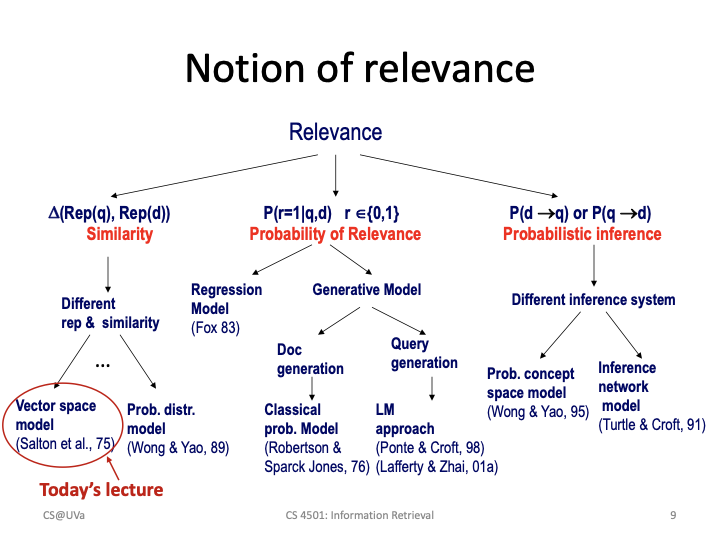

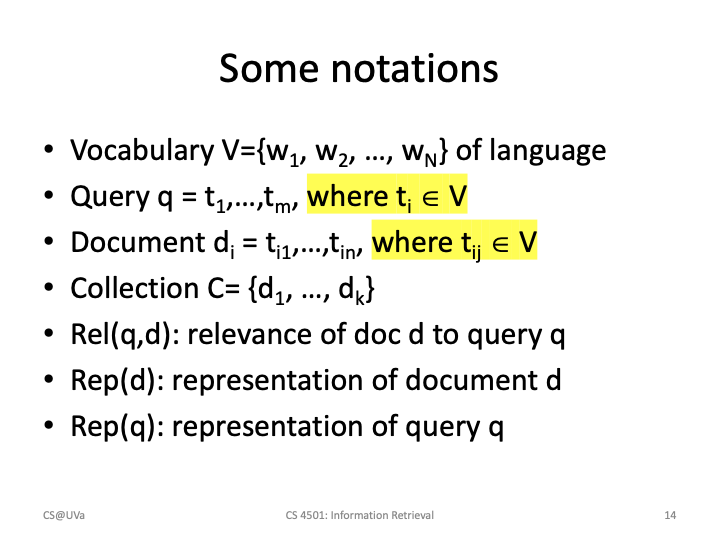

# Vector Space Model

- BOM이랑 잘 맞다
- 이 모델에서는 Weight가 전부이다.
- Weight는 Zipf's law같은 휴리스틱으로 정할거다.

## Represent both doc and query by "concept" vectors
- high dimension..
- concept은 쉽게말하자면 단어,bigram, ngram등 chunk같은거
- concept들은 서로 orthogonal하다고 가정
- similarity는 cosine 방법으로

# How to assign weoghts?
- important (query : 모든 term이 동등하게 important하진 않다. Doc: 어떤 term들은 더 많은 intormation을 carry.)

# How? -> TF-IDF

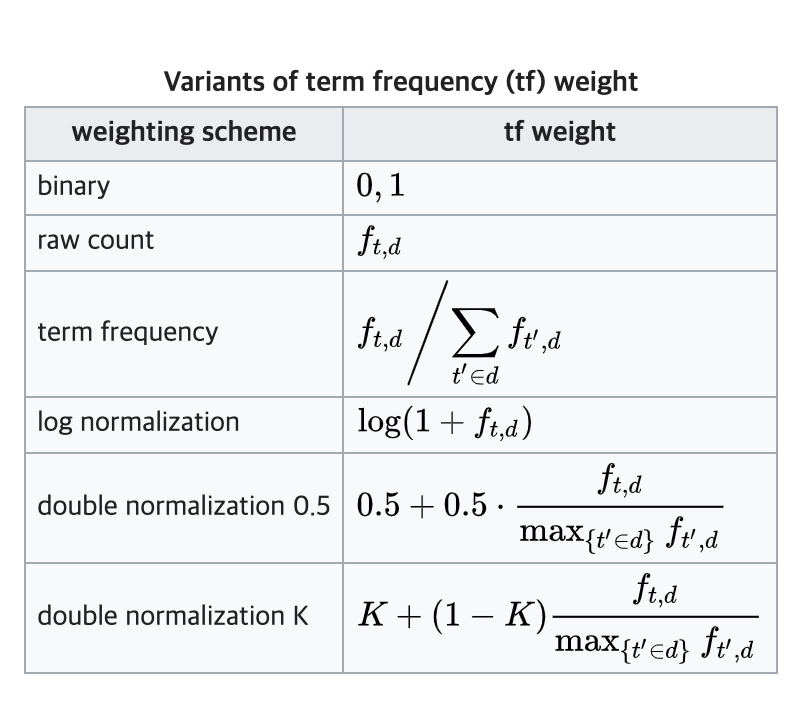

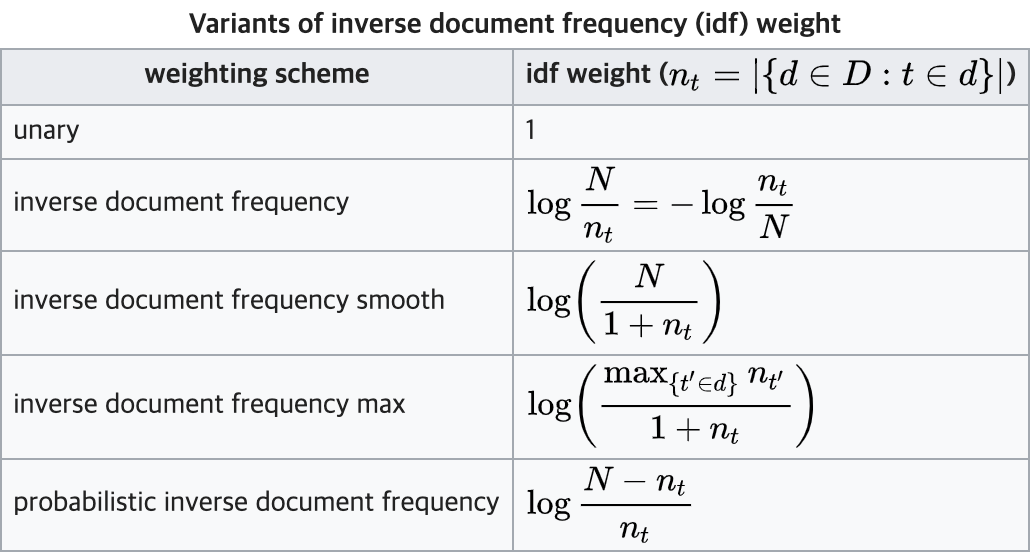

In [163]:
#각종 tf를 만들어보자

In [64]:
from math import log
tf1 = lambda f, tf :f/tf  #term frequency
tf2 = lambda f:log(1+f)   #log-normalization
tf3 = lambda f, mf, K=0.5 : (1-K)*(f/mf)



In [65]:
#TDM가지고 TF계산해보기

for j,docs in TDM.items():
    for i, f in docs.items():
        TF1 = tf1(f,sum(DTM[i].values()))   #TDM구조에서 계산하기힘들어서 DTM으로함.
        TF2 = tf2(f)
        TF3 = tf3(f,max(DTM[i].values()))
        #j번의 TF, i번째문서에서#
        print(V[j], j, TF1, TF2, TF3)
    break   

동영상 0 0.0037313432835820895 0.6931471805599453 0.038461538461538464
동영상 0 0.0025188916876574307 0.6931471805599453 0.027777777777777776
동영상 0 0.004975124378109453 0.6931471805599453 0.05
동영상 0 0.003952569169960474 0.6931471805599453 0.045454545454545456
동영상 0 0.005076142131979695 0.6931471805599453 0.07142857142857142
동영상 0 0.004901960784313725 0.6931471805599453 0.03571428571428571
동영상 0 0.005434782608695652 0.6931471805599453 0.0625
동영상 0 0.012195121951219513 0.6931471805599453 0.08333333333333333


In [66]:
#각종 idf

In [67]:
N = len(D)
idf1 = lambda nt:log(N/nt)
idf2 = lambda nt:log(1+N/nt)
idf3 = lambda mnt, nt:log(mnt/(1+nt))
idf4 = lambda nt:log((N-nt)/nt)
#idf4 보정
idf5 = lambda nt:log(1+(N-nt)/nt)

In [68]:
for j,docs in TDM.items():
    IDF1 = idf1(len(docs)) 
    IDF2 = idf2(len(docs))
    #IDF3 = idf3
    IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f,sum(DTM[i].values()))   #TDM구조에서 계산하기힘들어서 DTM으로함.
        TF2 = tf2(f)
        TF3 = tf3(f,max(DTM[i].values()))
        print(V[j], j, TF1, TF2, TF3)
    print(V[j],IDF1, IDF2, IDF4)
    break  

동영상 0 0.0037313432835820895 0.6931471805599453 0.038461538461538464
동영상 0 0.0025188916876574307 0.6931471805599453 0.027777777777777776
동영상 0 0.004975124378109453 0.6931471805599453 0.05
동영상 0 0.003952569169960474 0.6931471805599453 0.045454545454545456
동영상 0 0.005076142131979695 0.6931471805599453 0.07142857142857142
동영상 0 0.004901960784313725 0.6931471805599453 0.03571428571428571
동영상 0 0.005434782608695652 0.6931471805599453 0.0625
동영상 0 0.012195121951219513 0.6931471805599453 0.08333333333333333
동영상 1.4759065198095778 1.6817585740137264 1.2163953243244932


## 이중에 많이 쓰는 조합은
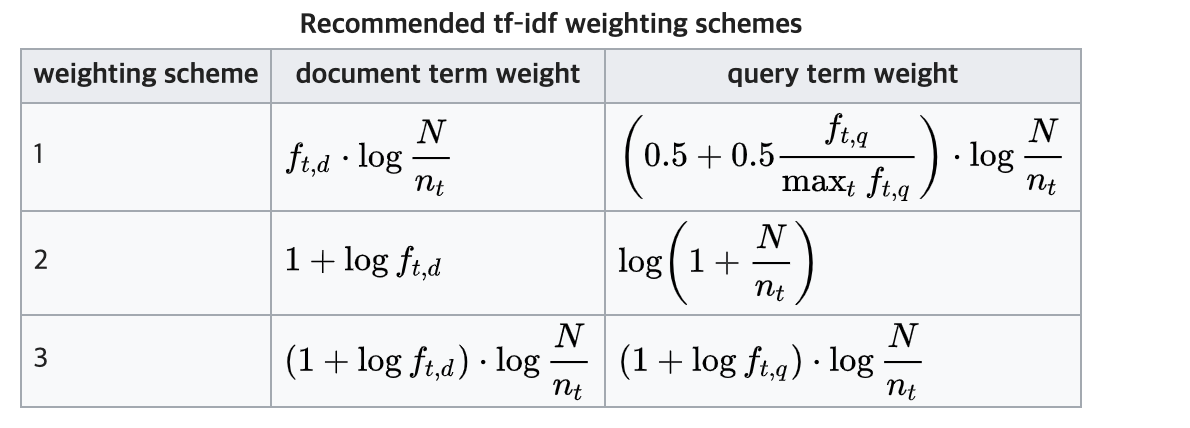

In [69]:
for j, docs in TDM.items():
    IDF1 = idf1(len(docs)) 
    IDF2 = idf2(len(docs))
    IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f,sum(DTM[i].values()))   #TDM구조에서 계산하기힘들어서 DTM으로함.
        TF2 = tf2(f)
        TF3 = tf3(f,max(DTM[i].values()),0)
        
        W1 = f*IDF1
        W2 = TF2*1
        W3 = TF2*IDF1
        
        # 선생님이 추천한, 많이쓰는
        W4 = TF3*IDF1
        print(V[j], i, W1, W2, W3, W4)
    print(V[j],IDF1, IDF2, IDF4)
    break  

동영상 0 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.11353127075458291
동영상 5 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.08199480665608765
동영상 6 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.14759065198095778
동영상 10 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.1341733199826889
동영상 15 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.2108437885442254
동영상 18 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.1054218942721127
동영상 19 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.18448831497619722
동영상 23 1.4759065198095778 0.6931471805599453 1.0230204429760499 0.24598441996826295
동영상 1.4759065198095778 1.6817585740137264 1.2163953243244932


In [145]:
# 어떤 조합을 쓰느냐에따라 w가 차이가 크게나는경우도 있고 아닌경우도 있어서 잘 골라야한다.

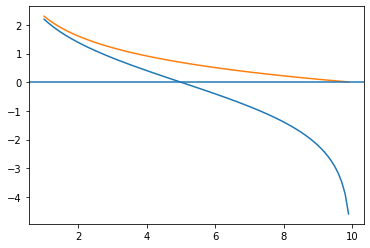

In [71]:
import matplotlib.pyplot as plt
N = 10
dfList = np.arange(1,10,0.1)

plt.plot(dfList, [idf4(_) for _ in dfList])
plt.plot(dfList, [idf5(_) for _ in dfList])
plt.axhline(0)
plt.show()

In [164]:
#idf4는 음수가될수있는데 tf*idf하면 음수가 될수도있어서 idf4안쓴다. 그래서 idf5로 보정.

In [72]:
TWM = defaultdict(lambda:defaultdict(int))
DocLength = defaultdict(float)

for j, docs in TDM.items():
    IDF1 = idf1(len(docs)) 
    IDF2 = idf2(len(docs))
    #IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f,sum(DTM[i].values()))   #TDM구조에서 계산하기힘들어서 DTM으로함.
        TF2 = tf2(f)
        TF3 = tf3(f,max(DTM[i].values()),0)
        
        W1 = f*IDF1
        W2 = TF2*1
        W3 = TF2*IDF1
        
        TWM[j][i] = W4
        DocLength[i] +=W4**2

In [73]:
from math import sqrt
Q = "한국 콜마 유튜브 강제시청 논란에 52주 신저가 불매 불매 운동 움직임"
# kkma.nouns("가방 가방 가방") 꼬꼬마로 noun쓸떄 주의. 여러번쳐도 한번나옴
_Q = [_[0] for _ in kkma.pos(Q) if _[1].startswith("N") and  _[0] in V]

QWM = defaultdict(float)

for t in _Q:
    j = V.index(t)
    QWM[j] +=1
    
maxfreq = max(QWM.values())

for j in QWM.keys():
    QWM[j] = tf3(QWM[j], maxfreq, 0.5) * idf1(len(TWM[j]))  #idf는 unary로하든지 학습한데이터로하든지
    
Qlength = sqrt(sum([_**2 for _ in QWM.values()]))

In [74]:
searchResult = defaultdict(float)

# for q_j, w_q in QWM.items():
#     for i, w in TWM[q_j].items():
#         searchResult[i] += q_j*i
        
# for i, ip in searchResult.items():
#     searchResult[i] = ip/(Qlength*sqrt(DocLength[i]))

for t in V:
    j = V.index(t)
    
    for i, w in TWM[j].items():
        searchResult[i] += (QWM[j]-w)**2
        
for i, ip in searchResult.items():
    searchResult[i] = - sqrt(ip)
    
for _ in sorted(searchResult.items(), key=lambda x:x[1], reverse=True) :
    print(_[1])
    print(collection[_[0]][:100])
    print()

-1.8733615300558306
동영상 뉴스 훈민정음 해례본 상주본의 소유권이 국가에 있다는 대법원 판결 이후 처음으로 문화재청이 소장자 배익기 씨를 만났습니다 배씨는 상주본을 돌려달라는 요구에 응하지 않았습니다

-1.8745824953484145
동남아 재력가 등을 상대로 성매매를 알선했다는 혐의를 받는 양현석 전 YG 총괄프로듀서가 경찰에 정식 입건됐습니다 서울지방경찰청 광역수사대는 양 전 총괄프로듀서를 성매매 알선 혐의

-2.2943899261981793
취재진이 입수한 국토부 내부 자료입니다 공식 발표 일주일 전쯤 작성됐는데 플랫폼 승차 서비스에 렌터카도 명시돼 있습니다 하지만 최종 내용엔 렌터카 허용 여부가 빠졌습니다 택시업계의

-2.496469204960008
앵커 북미 비핵화 실무협상 소식은 아직 전해지지 않고 있는 가운데 트럼프 대통령이 서두르진 않겠지만 좋은 일이 일어날 것이라고 낙관했습니다 대북 제재에 대해선 지금 그대로지만 어느

-2.5325646084384545
배우 강지환 뉴스1
배우 강지환42 본명 조태규씨의 성폭력 사건을 수사 중인 경찰이 강씨에 대한 마약 검사도 의뢰했다는 보도가 17일 나왔다 경찰이 강씨의 마약 투약을 의심한 배경

-2.6549945081899415
한국 수출 규제와 관련해 어떤 경로를 통해 뉴스를 접하는지 일본 젊은이들에게 물었습니다 기요하라대학생 여러 기사들이 한데 모여 있어서 편리하고 또 컬럼도 실려 있어서 야후 재팬을 

-2.694624312228839
무역 마찰 대화 협상 통해 해결해야
겅솽 중국 외교부 대변인 출처중국 외교부 뉴스1 서울뉴스1 김서연 기자 중국은 17일 미중 무역합의까지 갈 길이 멀고 우리에겐 관세를 부과할 수

-2.71556713925152
동영상 뉴스
앵커 정치권의 패스트트랙 고발전으로 국회의원 소환조사가 이어지고 있는 가운데 더불어민주당 표창원 의원과 윤준호 의원이 경찰에 출석했습니다 경찰 조사가 본격화했지만 자유

-2.7169867231528735
앵커 혈액백 가

In [77]:
from math import sqrt

searchResult = defaultdict(float)

for q_j, w_q in QWM.items():
    for i, w in TWM[q_j].items():
        searchResult[i] += q_j*i
        
for i, ip in searchResult.items():
    searchResult[i] = ip/(Qlength*sqrt(DocLength[i]))

for _ in sorted(searchResult.items(), key=lambda x:x[1], reverse=True) :
    print(_[1])
    print(collection[_[0]][:100])
    print()

1428985.3285728865
전제완 대표 주도 불록체인 기반의 보상형 플랫폼으로 진화
싸이월드 전제완 대표 사업다각화 나선 싸이월드 국내 IT업계의 혁신 성장을 주도했던 싸이월드 현재에도 3200만명의 회원을

1039993.2962098211
베트남 라인 GET IT과 네이버 패키지 여행 도마 올라 News1 서울뉴스1 박병진 기자 대한민국을 대표하는 정보기술IT 회사 네이버가 때아닌 표절 논란에 휘말렸다 상대는 경쟁사

880851.229608443
앵커 불법 촬영물을 찍어 온라인에 유포하는 디지털 성범죄가 날로 대담해지고 교묘해지고 있습니다 하지만 대부분 해외 서버를 이용하다 보니 단속이나 삭제가 어려운데요 KBS 취재결과 

786914.8402238527
앵커 장마전선이 다시 북상하고 있습니다 호남 경남지역에 내일18일까지 최고 150mm 넘는 많은 비가 예보됐습니다 5호 태풍 다나스도 우리나라를 향해 북상하고 있습니다 재난방송 스

736804.5825534911
한국경제TV 김주리 기자 특정 단백질이 뇌에 비정상적으로 많이 축적되면 의료계에선 그걸 알츠하이머병의 생물학적 표지로 본다 그런데 이런 단백질이 뇌 안에 퍼지는 속도와 패턴이 남녀

713440.1272256942
내가 누구를 두려워하리요임현수 지음규장 18년 동안 식량 교육 의료 문화 진흥 및 공업 시설 투자 등 여러 방면에서 대북 지원을 펼치다 북한에 억류됐던 한국계 캐나다인 임현수캐나다

638686.6633657773
앵커
북한이 90개국을 통해 52억 달러에 이르는 사치품을 수입한 사실도 확인됐습니다 대부분 중국을 통한 것이긴 하지만 북한으로의 사치품 수출을 금지하는 대북 제재망에 구멍이 뚫린

616050.6918731717
차 조달 운영 등 자율성 부족 플랫폼 업체에 투자 대리전 정부가 17일 모빌리티이동 플랫폼 사업을 허용하는 내용의 택시 제도 개편안을 발표했지만 택시 면허를 구입한 플랫폼 업체에 

572615.2565916493
무엇이 성숙인가조정민 지음두란노 지상파

In [ ]:
#query, doc 모두 벡터로 표현하고, 그 similiarity를 측정하는 measure를 선택해야한다.(코사인 값쓸거다.)

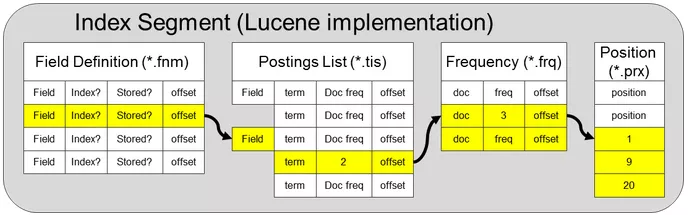